In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("out/data.csv")
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.head()

,ID,Start Time,Duration,Duration Milliseconds,Error
0,GET /,2024-02-12 10:02:08+00:00,341.398333ms,341,NaN
1,GET /,2024-02-12 10:02:08+00:00,341.626666ms,341,NaN
2,GET /,2024-02-12 10:02:08+00:00,343.605667ms,343,NaN
3,GET /anything,2024-02-12 10:02:09+00:00,294.09675ms,294,NaN
4,GET /anything,2024-02-12 10:02:09+00:00,296.477584ms,296,NaN


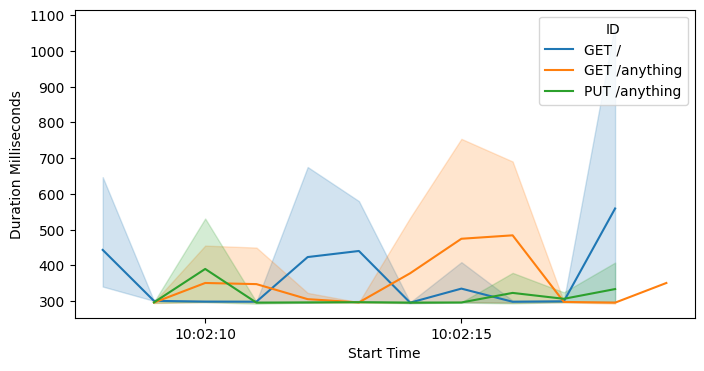

In [30]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df,x='Start Time',y='Duration Milliseconds',hue="ID")
plt.show()

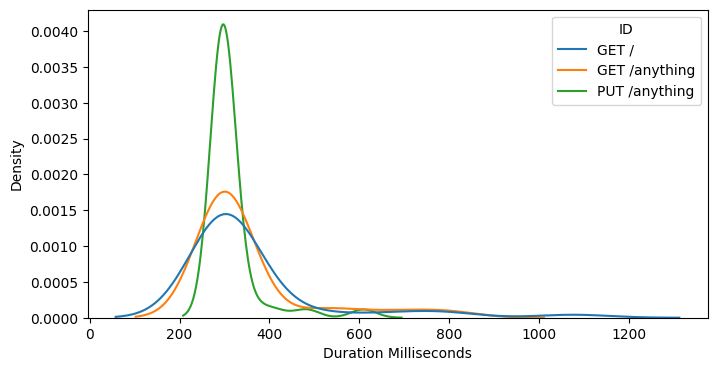

In [31]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df,x='Duration Milliseconds',hue="ID")
plt.show()